# TA-Lib サンプル

### ライブラリをここで一括インポート

In [30]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf
from talib import BBANDS, MACD, MFI, MOM, OBV, RSI, SAR, STOCH

## yfinance による株価データの取得

In [31]:
symbol = "^N225"
ticker = yf.Ticker(symbol)
df = ticker.history(start="2025-01-01", end="2025-07-01", interval="1d")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-06 00:00:00+09:00,39945.421875,39993.500000,39232.781250,39307.050781,137900000,0.0,0.0
2025-01-07 00:00:00+09:00,39584.359375,40288.800781,39584.359375,40083.300781,127000000,0.0,0.0
2025-01-08 00:00:00+09:00,39879.359375,40105.718750,39705.808594,39981.058594,118800000,0.0,0.0
2025-01-09 00:00:00+09:00,39888.910156,39930.070312,39385.050781,39605.089844,117000000,0.0,0.0
2025-01-10 00:00:00+09:00,39550.250000,39591.460938,39166.050781,39190.398438,113200000,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-24 00:00:00+09:00,38779.179688,38990.109375,38665.609375,38790.558594,100800000,0.0,0.0
2025-06-25 00:00:00+09:00,38904.179688,38944.769531,38711.109375,38942.070312,102900000,0.0,0.0
2025-06-26 00:00:00+09:00,39072.140625,39615.589844,39056.140625,39584.578125,123600000,0.0,0.0


### サンプル期間より少し古いデータから取得

In [32]:
df2 = ticker.history(start="2024-10-01", end="2025-07-01", interval="1d")
df2

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-01 00:00:00+09:00,38232.468750,38718.128906,38232.468750,38651.968750,132100000,0.0,0.0
2024-10-02 00:00:00+09:00,38136.199219,38213.539062,37651.070312,37808.761719,139600000,0.0,0.0
2024-10-03 00:00:00+09:00,38459.128906,38856.750000,38457.621094,38552.058594,126800000,0.0,0.0
2024-10-04 00:00:00+09:00,38594.730469,38735.289062,38501.820312,38635.621094,121200000,0.0,0.0
2024-10-07 00:00:00+09:00,39239.921875,39560.781250,39195.929688,39332.738281,128000000,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-24 00:00:00+09:00,38779.179688,38990.109375,38665.609375,38790.558594,100800000,0.0,0.0
2025-06-25 00:00:00+09:00,38904.179688,38944.769531,38711.109375,38942.070312,102900000,0.0,0.0
2025-06-26 00:00:00+09:00,39072.140625,39615.589844,39056.140625,39584.578125,123600000,0.0,0.0


## 日経平均株価指数

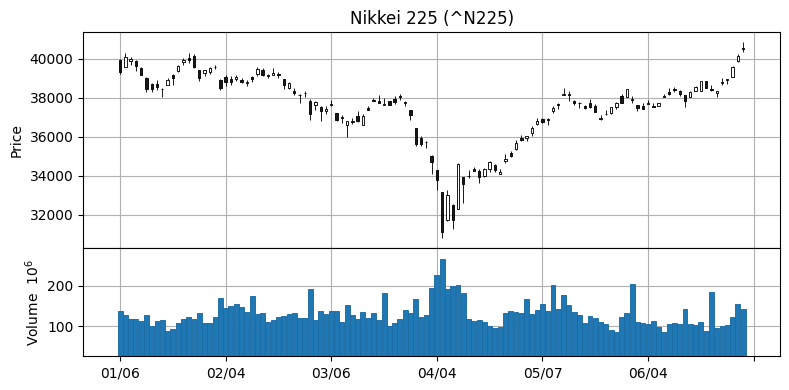

In [33]:
fig = plt.figure(figsize=(8, 4))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1, wspace=0.0, hspace=0.0, height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

mpf.plot(
    df,
    type="candle",
    style="default",
    datetime_format="%m/%d",
    xrotation=0,
    ax=ax[0],
    volume=ax[1],
)
ax[0].set_title(f"{ticker.info['longName']} ({symbol})")

plt.tight_layout()
plt.savefig("screenshots/n225_default.png")
plt.show()

## Bollinger Bands

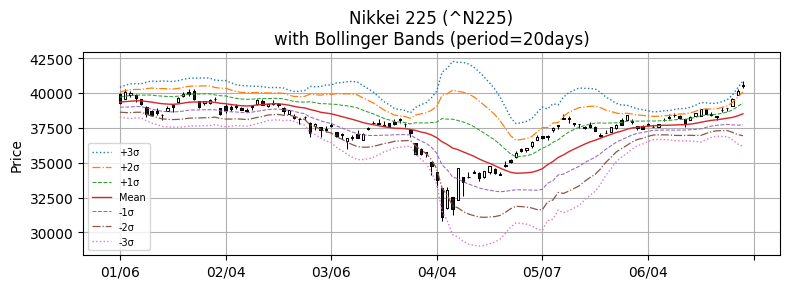

In [34]:
fig, ax = plt.subplots(figsize=(8, 3))

# BBANDS - Bollinger Bands
# upperband, middleband, lowerband = BBANDS(real, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
period = 20
mv_upper_1, mv_mean, mv_lower_1 = BBANDS(df2["Close"], period, 1, 1)
mv_upper_2, _, mv_lower_2 = BBANDS(df2["Close"], period, 2, 2)
mv_upper_3, _, mv_lower_3 = BBANDS(df2["Close"], period, 3, 3)

apds = [
    mpf.make_addplot(
        mv_upper_3[df.index],
        width=1,
        color="C0",
        linestyle="dotted",
        label="+3σ",
        ax=ax,
    ),
    mpf.make_addplot(
        mv_upper_2[df.index],
        width=0.9,
        color="C1",
        linestyle="dashdot",
        label="+2σ",
        ax=ax,
    ),
    mpf.make_addplot(
        mv_upper_1[df.index],
        width=0.75,
        color="C2",
        linestyle="dashed",
        label="+1σ",
        ax=ax,
    ),
    mpf.make_addplot(
        mv_mean[df.index],
        width=1,
        color="C3",
        linestyle="solid",
        label="Mean",
        ax=ax,
    ),
    mpf.make_addplot(
        mv_lower_1[df.index],
        width=0.75,
        color="C4",
        linestyle="dashed",
        label="-1σ",
        ax=ax,
    ),
    mpf.make_addplot(
        mv_lower_2[df.index],
        width=0.9,
        color="C5",
        linestyle="dashdot",
        label="-2σ",
        ax=ax,
    ),
    mpf.make_addplot(
        mv_lower_3[df.index],
        width=1,
        color="C6",
        linestyle="dotted",
        label="-3σ",
        ax=ax,
    ),
]
mpf.plot(
    df,
    type="candle",
    style="default",
    addplot=apds,
    datetime_format="%m/%d",
    xrotation=0,
    update_width_config=dict(candle_linewidth=0.75),
    ax=ax,
)
ax.grid()
ax.legend(fontsize=7)
ax.set_title(
    f"{ticker.info['longName']} ({symbol})\nwith Bollinger Bands (period={period}days)"
)

plt.tight_layout()
plt.savefig("screenshots/n225_talib_bbands.png")
plt.show()

## Parabolic SAR

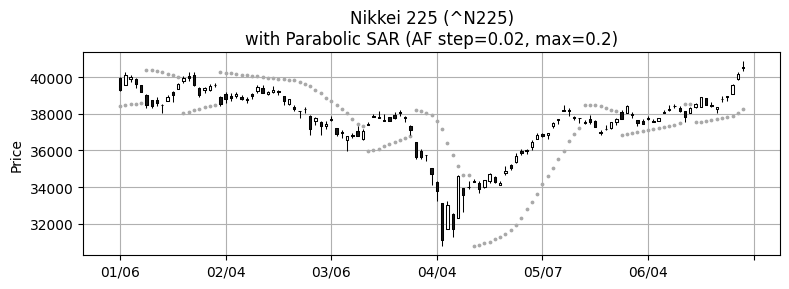

In [35]:
fig, ax = plt.subplots(figsize=(8, 3))

# SAR - Parabolic SAR
# real = SAR(high, low, acceleration=0, maximum=0)
af_step = 0.02
af_max = 0.2
sar = SAR(df2["High"], df2["Low"], af_step, af_max)

apds = [
    mpf.make_addplot(
        sar[df.index],
        type="scatter",
        marker="o",
        markersize=3,
        color="darkgray",
        ax=ax,
    ),
]
mpf.plot(
    df,
    type="candle",
    style="default",
    addplot=apds,
    datetime_format="%m/%d",
    xrotation=0,
    update_width_config=dict(candle_linewidth=0.75),
    ax=ax,
)
ax.grid()
ax.set_title(
    f"{ticker.info['longName']} ({symbol})\nwith Parabolic SAR (AF step={af_step}, max={af_max})"
)

plt.tight_layout()
plt.savefig("screenshots/n225_talib_sar.png")
plt.show()

## Momentum

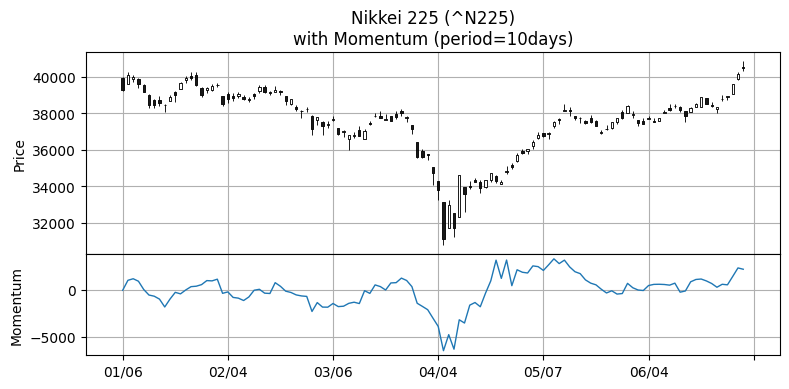

In [36]:
fig = plt.figure(figsize=(8, 4))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1, wspace=0.0, hspace=0.0, height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

# MOM - Momentum
# real = MOM(real, timeperiod=10)
period = 10
mom = MOM(df2["Close"], period)
apds = [
    mpf.make_addplot(
        mom[df.index],
        width=1,
        color="C0",
        linestyle="solid",
        ax=ax[1],
    ),
]
mpf.plot(
    df,
    type="candle",
    style="default",
    addplot=apds,
    datetime_format="%m/%d",
    xrotation=0,
    ax=ax[0],
)
ax[1].set_ylabel("Momentum")
ax[0].set_title(
    f"{ticker.info['longName']} ({symbol})\nwith Momentum (period={period}days)"
)

plt.tight_layout()
plt.savefig("screenshots/n225_talib_mom.png")
plt.show()

## RSI

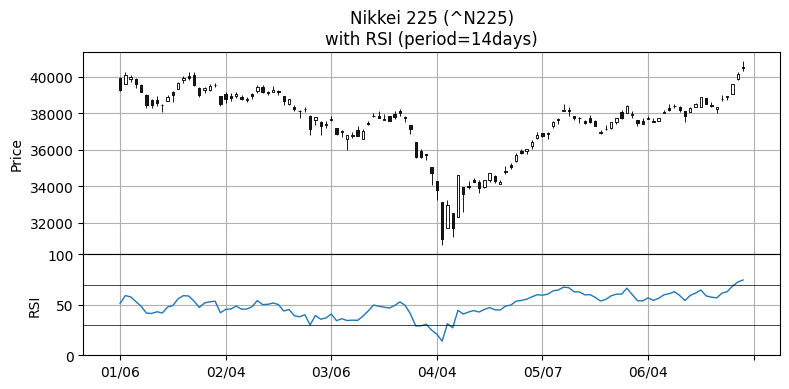

In [37]:
fig = plt.figure(figsize=(8, 4))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1, wspace=0.0, hspace=0.0, height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

# RSI - Relative Strength Index
# real = RSI(real, timeperiod=14)
period = 14
rsi = RSI(df2["Close"], period)
apds = [
    mpf.make_addplot(
        rsi[df.index],
        width=1,
        color="C0",
        linestyle="solid",
        ax=ax[1],
    ),
]
mpf.plot(
    df,
    type="candle",
    style="default",
    addplot=apds,
    datetime_format="%m/%d",
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title(f"{ticker.info['longName']} ({symbol})\nwith RSI (period={period}days)")
ax[1].set_ylabel("RSI")
ax[1].set_ylim(0, 100)
ax[1].axhline(30, color="black", linewidth=0.5)
ax[1].axhline(70, color="black", linewidth=0.5)

plt.tight_layout()
plt.savefig("screenshots/n225_talib_rsi.png")
plt.show()

## Stochastic oscillator

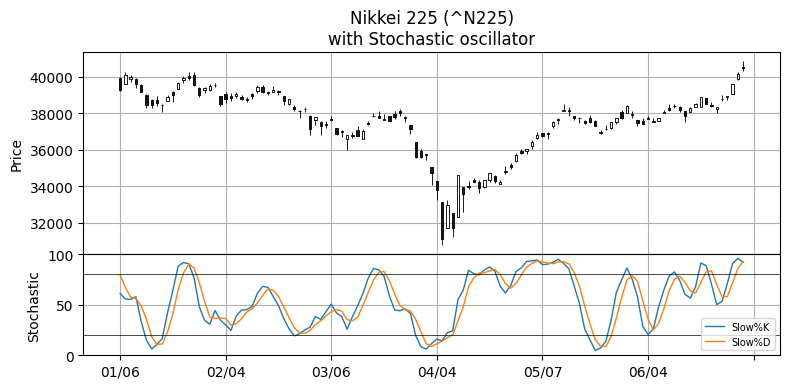

In [38]:
fig = plt.figure(figsize=(8, 4))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1, wspace=0.0, hspace=0.0, height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

# STOCH - Stochastic
# slowk, slowd = STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
slowk, slowd = STOCH(df2["High"], df2["Low"], df2["Close"])

apds = [
    mpf.make_addplot(
        slowk[df.index],
        width=1,
        color="C0",
        linestyle="solid",
        label="Slow%K",
        ax=ax[1],
    ),
    mpf.make_addplot(
        slowd[df.index],
        width=1,
        color="C1",
        linestyle="solid",
        label="Slow%D",
        ax=ax[1],
    ),
]
mpf.plot(
    df,
    type="candle",
    style="default",
    addplot=apds,
    datetime_format="%m/%d",
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title(f"{ticker.info['longName']} ({symbol})\nwith Stochastic oscillator")
ax[1].set_ylabel("Stochastic")
ax[1].set_ylim(0, 100)
ax[1].axhline(20, color="black", linewidth=0.5)
ax[1].axhline(80, color="black", linewidth=0.5)
ax[1].legend(fontsize=7)

plt.tight_layout()
plt.savefig("screenshots/n225_talib_stoch.png")
plt.show()

## MACD

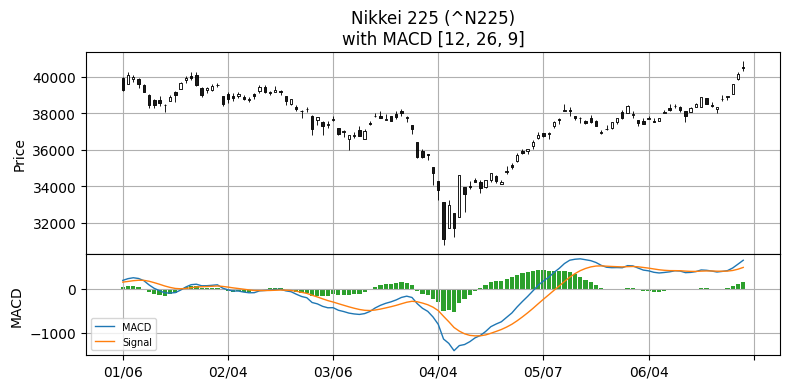

In [39]:
fig = plt.figure(figsize=(8, 4))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1, wspace=0.0, hspace=0.0, height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

# MACD - Moving Average Convergence/Divergence
# macd, macdsignal, macdhist = MACD(real, fastperiod=12, slowperiod=26, signalperiod=9)
period_fast = 12
period_slow = 26
period_signal = 9
macd, signal, macdhist = MACD(df2["Close"], period_fast, period_slow, period_signal)

apds = [
    mpf.make_addplot(
        macd[df.index],
        width=1,
        color="C0",
        linestyle="solid",
        label="MACD",
        ax=ax[1],
    ),
    mpf.make_addplot(
        signal[df.index],
        width=1,
        color="C1",
        linestyle="solid",
        label="Signal",
        ax=ax[1],
    ),
    mpf.make_addplot(
        macdhist[df.index],
        type="bar",
        color="C2",
        ax=ax[1],
    ),
]
mpf.plot(
    df,
    type="candle",
    style="default",
    addplot=apds,
    datetime_format="%m/%d",
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title(
    f"{ticker.info['longName']} ({symbol})\nwith MACD [{period_fast}, {period_slow}, {period_signal}]"
)
ax[1].set_ylabel("MACD")
ax[1].legend(fontsize=7)

plt.tight_layout()
plt.savefig("screenshots/n225_talib_macd.png")
plt.show()

## OBV

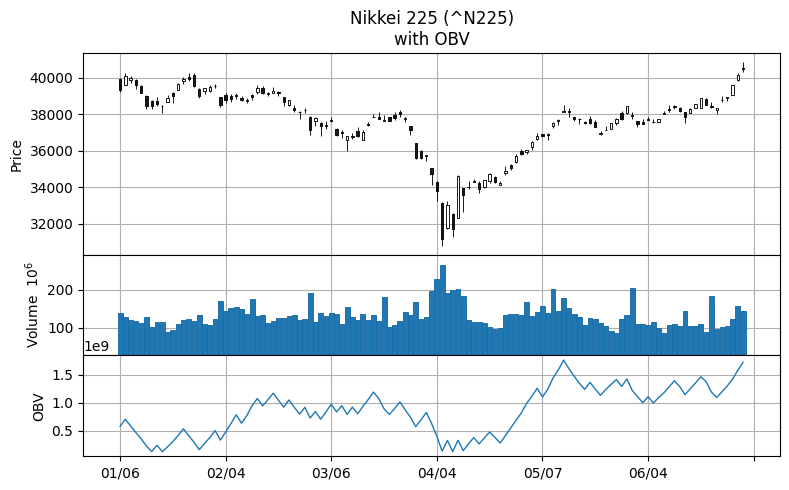

In [40]:
fig = plt.figure(figsize=(8, 5))
ax = dict()
n = 3
gs = fig.add_gridspec(
    n, 1, wspace=0.0, hspace=0.0, height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

# OBV - On Balance Volume
# real = OBV(close, volume)
obv = OBV(df2["Close"], df2["Volume"])

apds = [
    mpf.make_addplot(
        obv[df.index],
        width=1,
        color="C0",
        linestyle="solid",
        ax=ax[2],
    ),
]
mpf.plot(
    df,
    type="candle",
    style="default",
    addplot=apds,
    datetime_format="%m/%d",
    xrotation=0,
    ax=ax[0],
    volume=ax[1],
)
ax[0].set_title(f"{ticker.info['longName']} ({symbol})\nwith OBV")
ax[2].set_ylabel("OBV")

plt.tight_layout()
plt.savefig("screenshots/n225_talib_obv.png")
plt.show()

## MFI

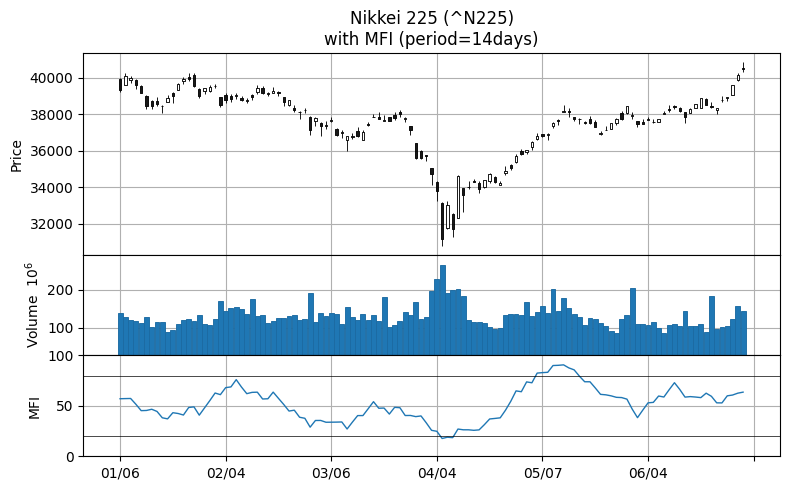

In [41]:
fig = plt.figure(figsize=(8, 5))
ax = dict()
n = 3
gs = fig.add_gridspec(
    n, 1, wspace=0.0, hspace=0.0, height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

# MFI - Money Flow Index
# NOTE: The MFI function has an unstable period.
# real = MFI(high, low, close, volume, timeperiod=14)
period = 14
mfi = MFI(df2["High"], df2["Low"], df2["Close"], df2["Volume"], period)

apds = [
    mpf.make_addplot(
        mfi[df.index],
        width=1,
        color="C0",
        linestyle="solid",
        ax=ax[2],
    ),
]
mpf.plot(
    df,
    type="candle",
    style="default",
    addplot=apds,
    datetime_format="%m/%d",
    xrotation=0,
    ax=ax[0],
    volume=ax[1],
)
ax[0].set_title(f"{ticker.info['longName']} ({symbol})\nwith MFI (period={period}days)")
ax[2].axhline(20, color="black", linewidth=0.5)
ax[2].axhline(80, color="black", linewidth=0.5)
ax[2].set_ylabel("MFI")
ax[2].set_ylim(0, 100)

plt.tight_layout()
plt.savefig("screenshots/n225_talib_mfi.png")
plt.show()